<a href="https://colab.research.google.com/github/ikkaya/PAINS-FooDB/blob/master/PAINS_FooDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import RDConfig
from rdkit import rdBase
from rdkit.Chem.Draw import IPythonConsole   #Needed to show molecules

In [4]:
# This path is configurable; I set it for my computer, but you can change it to whatever you have in yours
mypath = "./csv files/"

# To make sure we start to import in the first row we use header = None and give explicit names 
# to the columns with names = [...]
painsdf= pd.read_csv("wehi_pains.csv", header = None, names = ["smarts", "painsid"])
painsdf.head()

,smarts,painsid
0,c:1:c:c(:c:c:c:1-[#6;X4]-c:2:c:c:c(:c:c:2)-[#7...,<regId=anil_di_alk_F(14)>
1,c:1(:c(:c(:c(:c(:c:1-[#1])-[#1])-[#7](-[#1])-[...,<regId=hzone_anil(14)>
2,"c1(nn(c([c;!H0,$(c-[#6;!H0])]1)-[#8]-[#1])-c:2...",<regId=het_5_pyrazole_OH(14)>
3,"c:2(:c:1-[#16]-c:3:c(-[#7;!H0,$([#7]-[CH3]),$(...",<regId=het_thio_666_A(13)>
4,[#6]-2-[#6]-c:1:c(:c:c:c:c:1)-[#6](-c:3:c:c:c:...,<regId=styrene_A(13)>


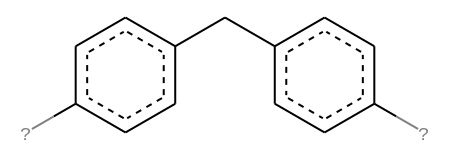

In [5]:
# Show the first SMARTS
Chem.MolFromSmarts(painsdf.smarts[0])

In [6]:
# I removed the rows in the compounds csv file with no SMILES (that was the origin of the problem); I also only imported a 
# few of the original columns.
foodf = pd.read_csv("foodbmols.csv", encoding='latin-1')
foodf.head()

,molid,name,moldb_smiles
0,1,Mulberrofuran P,CC1=C(O)C2=C3C(=C1)C1=C(O)C=C(C=C1OC3(OC1=C2C=...
1,4,Cyanidin 3-(6''-acetyl-galactoside),CC(=O)OC[C@H]1O[C@@H](OC2=CC3=C(O)C=C(O)C=C3[O...
2,13,Cyanidin 3-(6''-succinyl-glucoside),O[C@@H]1[C@@H](COC(=O)CCC(O)=O)O[C@@H](OC2=CC3...
3,14,Pelargonidin 3-(6''-succinyl-glucoside),O[C@@H]1[C@@H](COC(=O)CCC(O)=O)O[C@@H](OC2=CC3...
4,22,Cyanidin 3-O-(6''-acetyl-arabinoside),CC(=O)OC[C@H]1O[C@H](OC2=CC3=C(O)C=C(O)C=C3[O+...


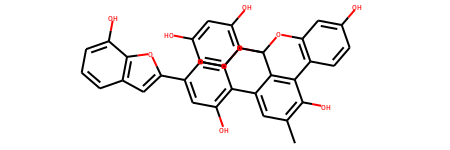

In [7]:
# Show the first SMILES
Chem.MolFromSmiles(foodf.moldb_smiles[0])

In [8]:
# Number of pains patterns
npat = painsdf.shape[0]
npat

480

In [9]:
# Number of molecules in foodb
nmol = foodf.shape[0]
nmol

26490

In [10]:
# Create the output n molecules x p patterns matrix filled with zeros
from numpy import zeros
resmat = zeros([nmol,npat])
resmat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
# Generate the patterns from the SMARTS
painsdf["patt"]  = painsdf["smarts"].apply(Chem.MolFromSmarts)
painsdf.head()

,smarts,painsid,patt
0,c:1:c:c(:c:c:c:1-[#6;X4]-c:2:c:c:c(:c:c:2)-[#7...,<regId=anil_di_alk_F(14)>,<rdkit.Chem.rdchem.Mol object at 0x7ffab5d1af80>
1,c:1(:c(:c(:c(:c(:c:1-[#1])-[#1])-[#7](-[#1])-[...,<regId=hzone_anil(14)>,<rdkit.Chem.rdchem.Mol object at 0x7ffab5d27030>
2,"c1(nn(c([c;!H0,$(c-[#6;!H0])]1)-[#8]-[#1])-c:2...",<regId=het_5_pyrazole_OH(14)>,<rdkit.Chem.rdchem.Mol object at 0x7ffab5d27080>
3,"c:2(:c:1-[#16]-c:3:c(-[#7;!H0,$([#7]-[CH3]),$(...",<regId=het_thio_666_A(13)>,<rdkit.Chem.rdchem.Mol object at 0x7ffab5d270d0>
4,[#6]-2-[#6]-c:1:c(:c:c:c:c:1)-[#6](-c:3:c:c:c:...,<regId=styrene_A(13)>,<rdkit.Chem.rdchem.Mol object at 0x7ffab5d27120>


In [0]:
# Generate the molecules from the SMILES
foodf["mol"] = foodf["moldb_smiles"].apply(Chem.MolFromSmiles)
foodf.head()

In [0]:
# Double loop over molecules and patterns to find matches; if any of molecules or patterns are None (failed to be created)
# set output to -1; if match, fill with 1. 
for i in range(foodf.shape[0]):
    for j in range(painsdf.shape[0]):
        m = foodf["mol"].iloc[i]
        p = painsdf["patt"].iloc[j]
        if m is None or p is None:
            resmat[i][j] = -1
        else:
            resmat[i][j] = m.HasSubstructMatch(p) 

In [14]:
# Show the matches; first array displays the row (molecule); second array displays the column (pattern)
np.where(resmat == 1)

(array([  180,   296,   296,   476,   512,   528,   615,   616,   689,
          691,   695,   699,   784,   786,   877,   903,  1131,  1185,
         1194,  1404,  1404,  1404,  1652,  1691,  1717,  1718,  1725,
         2146,  2209,  2216,  2235,  2251,  2327,  2328,  2330,  2330,
         2348,  2364,  2365,  2381,  2449,  2451,  2452,  2484,  2488,
         2490,  2565,  2566,  2605,  2605,  2606,  2606,  2615,  3025,
         3120,  3187,  3307,  3548,  3548,  3644,  3820,  3820,  3835,
         4105,  4253,  4270,  4286,  4410,  4630,  4658,  4658,  4671,
         4674,  4675,  4679,  4697,  5027,  5028,  5048,  5049,  5118,
         5131,  5150,  5201,  5207,  5353,  5421,  5430,  5449,  5503,
         5539,  5583,  5631,  5632,  5775,  5804,  5805,  5840,  6042,
         6150,  6150,  6318,  6318,  6438,  6625,  6661,  6680,  6725,
         6758,  6781,  6782,  6783,  6791,  6792,  6793,  6796,  6810,
         6810,  6811,  6827,  6828,  6916,  6938,  6943,  6952,  7064,
      

In [15]:
# Check that resmat is 1 for molecule 180 and pattern 468
resmat[180][468]

1.0

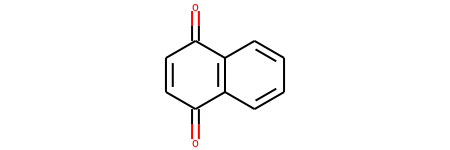

In [16]:
# Show the molecule with the match
foodf.mol.iloc[180]

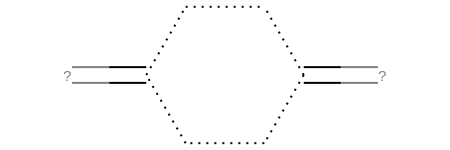

In [17]:
# Show the pattern with the match; see that it makes sense
painsdf.patt.iloc[468]

In [18]:
num_ones = (np.where(resmat == 1))
num_ones

(array([  180,   296,   296,   476,   512,   528,   615,   616,   689,
          691,   695,   699,   784,   786,   877,   903,  1131,  1185,
         1194,  1404,  1404,  1404,  1652,  1691,  1717,  1718,  1725,
         2146,  2209,  2216,  2235,  2251,  2327,  2328,  2330,  2330,
         2348,  2364,  2365,  2381,  2449,  2451,  2452,  2484,  2488,
         2490,  2565,  2566,  2605,  2605,  2606,  2606,  2615,  3025,
         3120,  3187,  3307,  3548,  3548,  3644,  3820,  3820,  3835,
         4105,  4253,  4270,  4286,  4410,  4630,  4658,  4658,  4671,
         4674,  4675,  4679,  4697,  5027,  5028,  5048,  5049,  5118,
         5131,  5150,  5201,  5207,  5353,  5421,  5430,  5449,  5503,
         5539,  5583,  5631,  5632,  5775,  5804,  5805,  5840,  6042,
         6150,  6150,  6318,  6318,  6438,  6625,  6661,  6680,  6725,
         6758,  6781,  6782,  6783,  6791,  6792,  6793,  6796,  6810,
         6810,  6811,  6827,  6828,  6916,  6938,  6943,  6952,  7064,
      

In [19]:
num_ones[1]

array([468, 205, 470, 468, 468, 468, 469, 468, 468, 468, 468, 468, 468,
       468, 473, 469, 468, 468, 470, 205, 469, 470,  58, 470, 468, 468,
       470, 468, 468, 468, 468, 468, 468, 468, 205, 470, 468, 468, 468,
       469,  58, 468, 468, 468, 468,  58, 468, 468,  58, 468,  58, 468,
       468, 470, 470, 470, 428, 205, 470, 468, 205, 470, 468, 468, 468,
       468, 468, 470, 468, 205, 470, 468, 468, 468, 468, 468, 470, 470,
       470, 470, 468, 470, 470, 470, 470, 468, 470, 468, 452, 470, 468,
       470,  63,  63, 468, 468, 473, 469, 472, 205, 470, 457, 468, 468,
       469, 472, 468, 469, 469, 468, 468, 470, 469, 469, 469, 469, 205,
       470, 468, 470, 470, 470, 470, 470, 468, 426, 468, 468, 205, 470,
       468,  58, 469, 469, 469, 472, 469, 472, 472, 469, 469, 468, 468,
       468, 470, 470, 468, 468, 468, 468, 468, 469, 470, 468, 468, 468,
       468, 468, 468, 468, 468, 468, 205, 470, 468, 468, 468, 468, 468,
       468, 468, 470, 468, 468, 468, 205, 470, 468, 470, 468, 20

In [20]:
unique, counts = np.unique(num_ones[1], return_counts = True)
dict(zip(unique, counts))

{58: 14,
 63: 2,
 185: 3,
 205: 32,
 414: 1,
 416: 1,
 426: 2,
 428: 2,
 452: 1,
 457: 3,
 468: 155,
 469: 33,
 470: 87,
 472: 11,
 473: 6}

In [21]:
counts

array([ 14,   2,   3,  32,   1,   1,   2,   2,   1,   3, 155,  33,  87,
        11,   6])

In [22]:
y = sorted(dict(zip(unique, counts)).values(), reverse=True)
y

[155, 87, 33, 32, 14, 11, 6, 3, 3, 2, 2, 2, 1, 1, 1]

In [23]:
df=pd.DataFrame(unique,counts,columns=['pains'])
df

,pains
14,58
2,63
3,185
32,205
1,414
1,416
2,426
2,428
1,452
3,457


In [24]:
df.sort_index(ascending=False)

,pains
155,468
87,470
33,469
32,205
14,58
11,472
6,473
3,185
3,457
2,63


In [25]:
df['pains'].apply(str)

14      58
2       63
3      185
32     205
1      414
1      416
2      426
2      428
1      452
3      457
155    468
33     469
87     470
11     472
6      473
Name: pains, dtype: object

In [26]:
y

[155, 87, 33, 32, 14, 11, 6, 3, 3, 2, 2, 2, 1, 1, 1]

In [27]:
df.sort_index(ascending=False)['pains']

155    468
87     470
33     469
32     205
14      58
11     472
6      473
3      185
3      457
2       63
2      426
2      428
1      414
1      416
1      452
Name: pains, dtype: int64

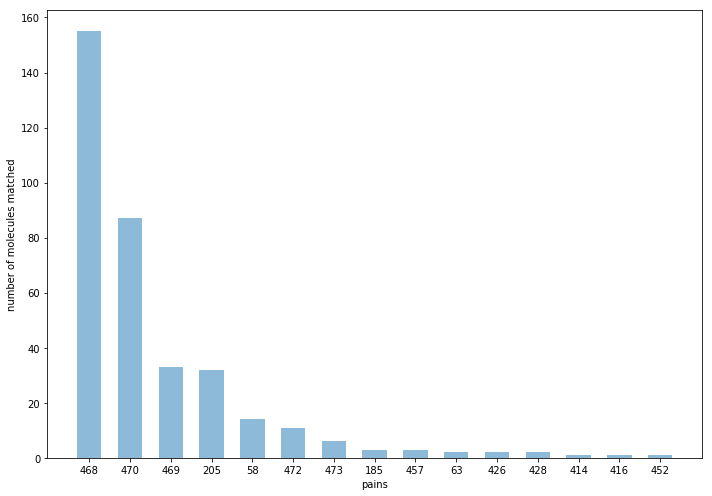

In [28]:
plt.figure(figsize = [10,7])
plt.bar(df.sort_index(ascending=False)['pains'].apply(str),y,alpha=0.5,width=0.6)
plt.xlabel('pains')
plt.ylabel('number of molecules matched')
plt.tight_layout()

In [29]:
len(num_ones[0]) #number of molecules that have substructure matches

353

In [30]:
len(num_ones[1])

353

In [0]:
non_match = nmol-len(set(num_ones[0]))

In [32]:
non_match #number of molecules with no matches

26174

In [33]:
painsdf['painsid'].iloc[df.sort_index(ascending=False)['pains']]

468          <regId=quinone_A(370)>
470        <regId=imine_one_A(321)>
469              <regId=azo_A(324)>
205            <regId=quinone_D(2)>
58       <regId=keto_keto_gamma(5)>
472      <regId=anil_di_alk_B(251)>
473      <regId=anil_di_alk_C(246)>
185            <regId=steroid_A(2)>
457         <regId=ene_one_hal(17)>
63            <regId=ene_misc_A(5)>
426      <regId=ene_five_het_E(44)>
428         <regId=thio_ketone(43)>
414      <regId=ene_five_het_C(85)>
416    <regId=keto_keto_beta_A(68)>
452         <regId=ene_cyano_A(19)>
Name: painsid, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

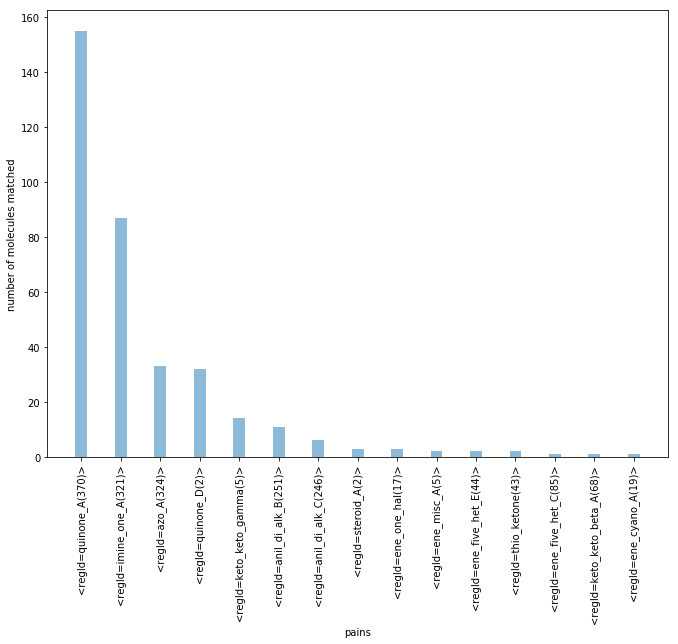

In [34]:
#barplot with the painsid 
plt.figure(figsize = [10,7])
plt.bar(painsdf['painsid'].iloc[df.sort_index(ascending=False)['pains']],y,alpha=0.5,width=0.3)
plt.xlabel('pains')
plt.ylabel('number of molecules matched')
plt.tight_layout()
plt.xticks(rotation=90)

In [35]:
most_hitting_smarts = painsdf['smarts'].iloc[df.sort_index(ascending=False)['pains']].head()
most_hitting_smarts

468    [!#6&!#1]=[#6]1[#6]=,:[#6][#6](=[!#6&!#1])[#6]...
470    [#6]-[#6](=[!#6&!#1;!R])-[#6](=[!#6&!#1;!R])-[...
469                                         [#7;!R]=[#7]
205    [#6]-1(-[#6]=,:[#6]-[#6]=,:[#6]-[#6]-1=[!#6&!#...
58     [#8]=[#6]-1-[#6;X4]-[#6]-[#6](=[#8])-c:2:c:c:c...
Name: smarts, dtype: object

In [36]:
smart_list = most_hitting_smarts.values.tolist()
smart_list

['[!#6&!#1]=[#6]1[#6]=,:[#6][#6](=[!#6&!#1])[#6]=,:[#6]1',
 '[#6]-[#6](=[!#6&!#1;!R])-[#6](=[!#6&!#1;!R])-[$([#6]),$([#16](=[#8])=[#8])]',
 '[#7;!R]=[#7]',
 '[#6]-1(-[#6]=,:[#6]-[#6]=,:[#6]-[#6]-1=[!#6&!#1])=[!#6&!#1]',
 '[#8]=[#6]-1-[#6;X4]-[#6]-[#6](=[#8])-c:2:c:c:c:c:c-1:2']

In [37]:
mol_list = [Chem.MolFromSmarts(smarts) for smarts in smart_list]
mol_list

In [38]:
mol_ids = painsdf['painsid'].iloc[df.sort_index(ascending=False)['pains']].head().values.tolist()
mol_ids

['<regId=quinone_A(370)>',
 '<regId=imine_one_A(321)>',
 '<regId=azo_A(324)>',
 '<regId=quinone_D(2)>',
 '<regId=keto_keto_gamma(5)>']

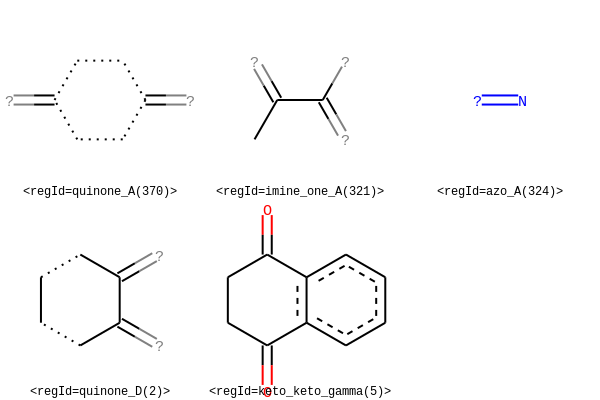

In [39]:
Chem.Draw.MolsToGridImage(mol_list, legends=mol_ids) #the structures of the 5 most hitting SMARTS

In [40]:
compounds_table = pd.read_csv('compounds.csv', encoding = 'latin-1')
compounds_table

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14,17,45,50,51,54,55,62,63,64,65,66,67,68,69,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,legacy_id,type,public_id,name,export,state,annotation_quality,description,cas_number,melting_point,protein_formula,protein_weight,experimental_solubility,experimental_logp,hydrophobicity,isoelectric_point,metabolism,kegg_compound_id,pubchem_compound_id,pubchem_substance_id,chebi_id,het_id,uniprot_id,uniprot_name,genbank_id,wikipedia_id,synthesis_citations,general_citations,comments,protein_structure_file_name,protein_structure_content_type,protein_structure_file_size,protein_structure_updated_at,msds_file_name,msds_content_type,msds_file_size,msds_updated_at,creator_id,updater_id,...,experimental_pka,experimental_pka_reference,experimental_solubility_reference,experimental_logp_reference,hydrophobicity_reference,isoelectric_point_reference,melting_point_reference,moldb_alogps_logp,moldb_logp,moldb_alogps_logs,moldb_smiles,moldb_pka,moldb_formula,moldb_average_mass,moldb_inchi,moldb_mono_mass,moldb_inchikey,moldb_alogps_solubility,moldb_id,moldb_iupac,structure_source,duplicate_id,old_dfc_id,dfc_name,compound_source,flavornet_id,goodscent_id,superscent_id,phenolexplorer_metabolite_id,kingdom,superklass,klass,subklass,direct_parent,molecular_framework,chembl_id,chemspider_id,meta_cyc_id,foodcomex,phytohub_id
0,1,1.0,SmallMoleculeCompound,FDB000001,Mulberrofuran P,True,NaN,low,Constit. of Morus alba (white mulberry) [CCD],101365-02-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.92,7.235094,-3.87,CC1=C(O)C2=C3C(=C1)C1=C(O)C=C(C=C1OC3(OC1=C2C=...,8.385903,C34H22O9,574.5331,InChI=1S/C34H22O9/c1-15-9-21-29-25(39)10-17(26...,574.126382,InChIKey=FWGPZPDSNMFTHJ-UHFFFAOYSA-N,7.67e-02 g/l,31941.0,"1-(2,4-dihydroxyphenyl)-17-(7-hydroxy-1-benzof...",HMDB_from_dfc,NaN,NaN,Mulberrofuran P,DFC,NaN,NaN,NaN,NaN,Organic compounds,Phenylpropanoids and polyketides,2-arylbenzofuran flavonoids,NaN,2-arylbenzofuran flavonoids,Aromatic heteropolycyclic compounds,NaN,NaN,NaN,NaN,NaN
1,4,4.0,SmallMoleculeCompound,FDB000004,Cyanidin 3-(6''-acetyl-galactoside),True,NaN,low,Constit. of the leaves of Nymphaea alba [CCD],350602-26-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.77,0.816100,-3.13,CC(=O)OC[C@H]1O[C@@H](OC2=CC3=C(O)C=C(O)C=C3[O...,7.458000,C23H23O12,491.4215,InChI=1S/C23H22O12/c1-9(24)32-8-18-19(29)20(30...,491.119000,InChIKey=HBXXDBKJLPLXPR-DLBZZEGUSA-O,3.94e-01 g/l,80753.0,"3-{[(2S,3R,4S,5R,6R)-6-[(acetyloxy)methyl]-3,4...",MANUAL,NaN,NaN,"3,3',4',5,7-Pentahydroxyflavylium(1+); 3-O-(6-...",PHENOLEXPLORER,NaN,NaN,NaN,NaN,Organic compounds,Phenylpropanoids and polyketides,Flavonoids,Flavonoid glycosides,Anthocyanidin-3-O-glycosides,Aromatic heteropolycyclic compounds,NaN,NaN,NaN,NaN,NaN
2,13,22.0,SmallMoleculeCompound,FDB000013,Cyanidin 3-(6''-succinyl-glucoside),True,NaN,low,Constit. of Phragmites australis [CCD],216692-08-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.68,0.608000,-3.21,O[C@@H]1[C@@H](COC(=O)CCC(O)=O)O[C@@H](OC2=CC3...,6.389100,C25H25O14,549.4576,InChI=1S/C25H24O14/c26-11-6-14(28)12-8-17(24(3...,549.124400,InChIKey=MIYGQTFETYBMKF-WVXUANQFSA-O,3.63e-01 g/l,80754.0,"3-{[(2S,3R,4S,5S,6R)-6-{[(3-carboxypropanoyl)o...",MANUAL,NaN,NaN,"3,3',4',5,7-Pentahydroxyflavylium(1+); 3-O-(6-...",PHENOLEXPLORER,NaN,NaN,NaN,NaN,Organic compounds,Phenylpropanoids and polyketides,Flavonoids,Flavonoid glycosides,Anthocyanidin-3-O-glycosides,Aromatic heteropolycyclic compounds,NaN,NaN,NaN,NaN,NaN
3,14,23.0,SmallMoleculeCompound,FDB000014,Pelargonidin 3-(6''-succinyl-glucoside),True,liquid,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.72,0.892400,-3.36,O[C@@H]1[C@@H](COC(=O)CCC(O)=O)O[C@@H](OC2=CC3...,6.39760

In [41]:
num_ones[0]

array([  180,   296,   296,   476,   512,   528,   615,   616,   689,
         691,   695,   699,   784,   786,   877,   903,  1131,  1185,
        1194,  1404,  1404,  1404,  1652,  1691,  1717,  1718,  1725,
        2146,  2209,  2216,  2235,  2251,  2327,  2328,  2330,  2330,
        2348,  2364,  2365,  2381,  2449,  2451,  2452,  2484,  2488,
        2490,  2565,  2566,  2605,  2605,  2606,  2606,  2615,  3025,
        3120,  3187,  3307,  3548,  3548,  3644,  3820,  3820,  3835,
        4105,  4253,  4270,  4286,  4410,  4630,  4658,  4658,  4671,
        4674,  4675,  4679,  4697,  5027,  5028,  5048,  5049,  5118,
        5131,  5150,  5201,  5207,  5353,  5421,  5430,  5449,  5503,
        5539,  5583,  5631,  5632,  5775,  5804,  5805,  5840,  6042,
        6150,  6150,  6318,  6318,  6438,  6625,  6661,  6680,  6725,
        6758,  6781,  6782,  6783,  6791,  6792,  6793,  6796,  6810,
        6810,  6811,  6827,  6828,  6916,  6938,  6943,  6952,  7064,
        7211,  7212,

In [42]:
compounds_table.loc[[180,296],['name', 'description', 'phenolexplorer_metabolite_id', 'molecular_framewok']]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,name,description,phenolexplorer_metabolite_id,molecular_framewok
180,2-Methoxy-5-prop-1-enylphenol,NaN,NaN,NaN
296,6-O-Methylcodeine,Minor alkaloid of Papaver somniferum (opium po...,NaN,NaN


In [43]:
foodf.loc[foodf['name']=='6-O-Methylcodeine']	

,molid,name,moldb_smiles,mol
294,458,6-O-Methylcodeine,COC1C=CC2C3CC4=C5C(OC1C25CCN3C)=C(OC)C=C4,<rdkit.Chem.rdchem.Mol object at 0x7ffab5d3cf80>


In [44]:
foodf.iloc[180]

molid                                                        340
name                                           1,4-Naphtoquinone
moldb_smiles                            O=C1C=CC(=O)C2=C1C=CC=C2
mol             <rdkit.Chem.rdchem.Mol object at 0x7ffab5d3ab20>
Name: 180, dtype: object

In [45]:
compounds_table['name'].iloc[180]

'2-Methoxy-5-prop-1-enylphenol'

In [46]:
#there are differences between the index numbers of the foodbmols.csv and compounds.csv files
#therefore, we need a common column which is 'name' for both table
compounds_table.loc[compounds_table['name']== '1,4-Naphtoquinone'] 

,id,legacy_id,type,public_id,name,export,state,annotation_quality,description,cas_number,melting_point,protein_formula,protein_weight,experimental_solubility,experimental_logp,hydrophobicity,isoelectric_point,metabolism,kegg_compound_id,pubchem_compound_id,pubchem_substance_id,chebi_id,het_id,uniprot_id,uniprot_name,genbank_id,wikipedia_id,synthesis_citations,general_citations,comments,protein_structure_file_name,protein_structure_content_type,protein_structure_file_size,protein_structure_updated_at,msds_file_name,msds_content_type,msds_file_size,msds_updated_at,creator_id,updater_id,...,experimental_pka,experimental_pka_reference,experimental_solubility_reference,experimental_logp_reference,hydrophobicity_reference,isoelectric_point_reference,melting_point_reference,moldb_alogps_logp,moldb_logp,moldb_alogps_logs,moldb_smiles,moldb_pka,moldb_formula,moldb_average_mass,moldb_inchi,moldb_mono_mass,moldb_inchikey,moldb_alogps_solubility,moldb_id,moldb_iupac,structure_source,duplicate_id,old_dfc_id,dfc_name,compound_source,flavornet_id,goodscent_id,superscent_id,phenolexplorer_metabolite_id,kingdom,superklass,klass,subklass,direct_parent,molecular_framework,chembl_id,chemspider_id,meta_cyc_id,foodcomex,phytohub_id
182,340,604.0,SmallMoleculeCompound,FDB000340,"1,4-Naphtoquinone",True,NaN,low,NaN,130-15-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.61,1.49,-2.28,O=C1C=CC(=O)C2=C1C=CC=C2,NaN,C10H6O2,158.1534,InChI=1S/C10H6O2/c11-9-5-6-10(12)8-4-2-1-3-7(8...,158.036779,InChIKey=FRASJONUBLZVQX-UHFFFAOYSA-N,8.31e-01 g/l,27716.0,"1,4-dihydronaphthalene-1,4-dione",MANUAL,NaN,NaN,NaN,PHENOLEXPLORER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
names_of_mol = foodf.loc[num_ones[0],['name']] # names of the molecules that match the PAINS
names_of_mol

,name
180,"1,4-Naphtoquinone"
296,Chlorogenoquinone
296,Chlorogenoquinone
476,Laccaic acid D
512,Neodiospyrin
528,Amitenone
615,Diazenedicarboxamide
616,Glucoobtusifolin
689,"2,6-Dimethoxy-1,4-benzoquinone"
691,"2,6-Di-tert-butyl-1,4-benzoquinone"


In [48]:
name_list = names_of_mol['name'].values.tolist()
name_list

['1,4-Naphtoquinone',
 'Chlorogenoquinone',
 'Chlorogenoquinone',
 'Laccaic acid D',
 'Neodiospyrin',
 'Amitenone',
 'Diazenedicarboxamide',
 'Glucoobtusifolin',
 '2,6-Dimethoxy-1,4-benzoquinone',
 '2,6-Di-tert-butyl-1,4-benzoquinone',
 '1,8-Dihydroxy-3-hydroxymethylanthraquinone 8-O-b-D-glucoside',
 'Cyclovariegatin',
 'Menadione',
 'Dantron',
 'Cyclodopa glucoside',
 'Cochineal Red A',
 'Vitamin K2',
 'Boviquinone 4',
 'Cohulupone',
 'Cerasin',
 'Cerasin',
 'Cerasin',
 'Foeniculoside X',
 '3-Hydroxy-3-(3,4-dihydroxy-4-methylpentanoyl)-5-(3-methylbutyl)-1,2,4-cyclopentanetrione',
 'Plastoquinone 8',
 'Plastoquinone 9',
 'Adhulupone',
 'Artonol D',
 'Thelephoric acid',
 'Tocopheronic acid',
 'Trisjuglone',
 'C.I. Natural Red 20',
 'Bisisodiospyrin',
 'Blighinone',
 'Sclareapinone',
 'Sclareapinone',
 'Carminic acid',
 'Chrysophanol',
 'Pulmatin',
 'Disodium 6-hydroxy-5-[(4-sulfophenyl)azo]-2-naphthalenesulfonate',
 'Heliocide H3',
 '(E,E)-Boviquinone 3',
 'Hemigossypolone',
 '8-Hydroxy

In [49]:
#names, descriptions, phenolexplorer id and molecular frameworks of the molecules that match the PAINS 

compounds_table.loc[compounds_table['name'].isin(name_list),['name', 'description', 'phenolexplorer_metabolite_id', 'molecular_framewok']]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,name,description,phenolexplorer_metabolite_id,molecular_framewok
182,"1,4-Naphtoquinone",NaN,NaN,NaN
298,Chlorogenoquinone,Forms coloured adducts with amino acids and pe...,NaN,NaN
480,Laccaic acid D,Constit. of rhubarb rhizomes,NaN,NaN
516,Neodiospyrin,Isol. from roots of Diospyros kaki (Japanese p...,NaN,NaN
532,Amitenone,Pigment from the edible mushroom Amitake (Suil...,NaN,NaN
619,Diazenedicarboxamide,Bleaching agent for flour,NaN,NaN
620,Glucoobtusifolin,Isol. from seeds of Cassia tora (charota),NaN,NaN
693,"2,6-Dimethoxy-1,4-benzoquinone",Constit. of bark of Phyllostachys heterocycla ...,NaN,NaN
695,"2,6-Di-tert-butyl-1,4-benzoquinone","Detected in tapwater as presumed oxidant of 2,...",NaN,NaN
699,"1,8-Dihydroxy-3-hydroxymethylanthraquinone 8-O...","Found in Chinese rhubarb (Rheum palmatum), cas...",NaN,NaN


In [50]:
compounds_health_effects = pd.read_csv('compounds_health_effects.csv', encoding = 'latin-1')
compounds_health_effects

,id,compound_id,health_effect_id,orig_health_effect_name,orig_compound_name,orig_citation,citation,citation_type,created_at,updated_at,creator_id,updater_id,source_id,source_type
0,1,453,1,(+)-Inotropic,THEOPHYLLINE,NaN,DUKE,DATABASE,2012-04-10 14:16:06,2014-11-05 14:49:49,NaN,NaN,453,Compound
1,2,2100,1,(+)-Inotropic,CAFFEINE,NaN,DUKE,DATABASE,2012-04-10 14:16:06,2014-11-05 14:49:49,NaN,NaN,2100,Compound
2,3,9030,2,(-)-Chronotropic,BORNYL-ACETATE,NaN,DUKE,DATABASE,2012-04-10 14:16:06,2014-11-05 14:49:49,NaN,NaN,9030,Compound
3,4,13577,2,(-)-Chronotropic,BORNEOL,NaN,DUKE,DATABASE,2012-04-10 14:16:06,2014-11-05 14:49:49,NaN,NaN,13577,Compound
4,5,14619,2,(-)-Chronotropic,"1,8-CINEOLE",NaN,DUKE,DATABASE,2012-04-10 14:16:06,2014-11-05 14:49:49,NaN,NaN,14619,Compound
5,6,9030,3,(-)-Inotropic,BORNYL-ACETATE,NaN,DUKE,DATABASE,2012-04-10 14:16:06,2014-11-05 14:49:49,NaN,NaN,9030,Compound
6,7,13577,3,(-)-Inotropic,BORNEOL,NaN,DUKE,DATABASE,2012-04-10 14:16:06,2014-11-05 14:49:49,NaN,NaN,13577,Compound
7,8,14619,3,(-)-Inotropic,"1,8-CINEOLE",NaN,DUKE,DATABASE,2012-04-10 14:16:06,2014-11-05 14:49:49,NaN,NaN,14619,Compound
8,9,633,4,11B-HSD-Inhibitor,KAEMPFEROL,NaN,DUKE,DATABASE,2012-04-10 14:16:06,2014-11-05 14:49:49,NaN,NaN,633,Compound
9,10,678,4,11B-HSD-Inhibitor,NARINGENIN,NaN,DUKE,DATABASE,2012-04-10 14:16:06,2014-11-05 14:49:49,NaN,NaN,678,Compound


In [51]:
ids_of_mol = foodf.loc[num_ones[0],['molid']] # id of the molecules that match the PAINS
ids_of_mol

,molid
180,340
296,460
296,460
476,643
512,681
528,697
615,784
616,785
689,858
691,860


In [52]:
id_list = ids_of_mol['molid'].values.tolist()
id_list

[340,
 460,
 460,
 643,
 681,
 697,
 784,
 785,
 858,
 860,
 864,
 868,
 953,
 955,
 1048,
 1076,
 1310,
 1364,
 1373,
 1596,
 1596,
 1596,
 1867,
 1906,
 1933,
 1934,
 1941,
 2364,
 2428,
 2435,
 2454,
 2470,
 2547,
 2548,
 2550,
 2550,
 2568,
 2584,
 2585,
 2601,
 2669,
 2671,
 2672,
 2704,
 2708,
 2710,
 2785,
 2786,
 2825,
 2825,
 2826,
 2826,
 2835,
 3247,
 3342,
 3409,
 3548,
 3998,
 3998,
 4175,
 4550,
 4550,
 4598,
 5317,
 5756,
 5818,
 5845,
 6200,
 6851,
 6940,
 6940,
 6982,
 6998,
 6999,
 7006,
 7041,
 8050,
 8051,
 8071,
 8072,
 8141,
 8154,
 8173,
 8224,
 8230,
 8377,
 8445,
 8454,
 8473,
 8527,
 8563,
 8608,
 8656,
 8657,
 8802,
 8832,
 8833,
 8868,
 9416,
 9722,
 9722,
 10134,
 10134,
 10515,
 10702,
 10738,
 10757,
 10802,
 10835,
 10858,
 10859,
 10860,
 10868,
 10869,
 10870,
 10873,
 10887,
 10887,
 10888,
 10904,
 10905,
 10994,
 11016,
 11021,
 11030,
 11143,
 11291,
 11292,
 11293,
 11293,
 11294,
 11363,
 11414,
 11416,
 11417,
 11418,
 11425,
 11426,
 11427,
 11

In [55]:
#the columns "orig_health_effect_name", "orig_citation", "citation" and "citation_type" for the PAINS hitting compounds
compounds_health_effects.loc[compounds_health_effects['id'].isin(id_list),['orig_health_effect_name', 'orig_citation', 'citation', 'citation_type']]

,orig_health_effect_name,orig_citation,citation,citation_type
339,Allergenic,NaN,DUKE,DATABASE
459,Analgesic,NaN,DUKE,DATABASE
642,Antiacne,NaN,DUKE,DATABASE
680,Antiaflatoxin,NaN,DUKE,DATABASE
696,Antiaggregant,NaN,DUKE,DATABASE
783,Antialcoholic,NaN,DUKE,DATABASE
784,Antialcoholic,NaN,DUKE,DATABASE
857,Antialzheimeran,NaN,DUKE,DATABASE
859,Antialzheimeran,NaN,DUKE,DATABASE
863,Antialzheimeran,NaN,DUKE,DATABASE


In [58]:
compounds_health_effects.iloc[339]

id                                         340
compound_id                               2558
health_effect_id                            43
orig_health_effect_name             Allergenic
orig_compound_name                CAFFEIC-ACID
orig_citation                              NaN
citation                                  DUKE
citation_type                         DATABASE
created_at                 2012-04-10 14:16:15
updated_at                 2014-11-05 14:49:52
creator_id                                 NaN
updater_id                                 NaN
source_id                                 2558
source_type                           Compound
Name: 339, dtype: object